## Исследовательский анализ данных

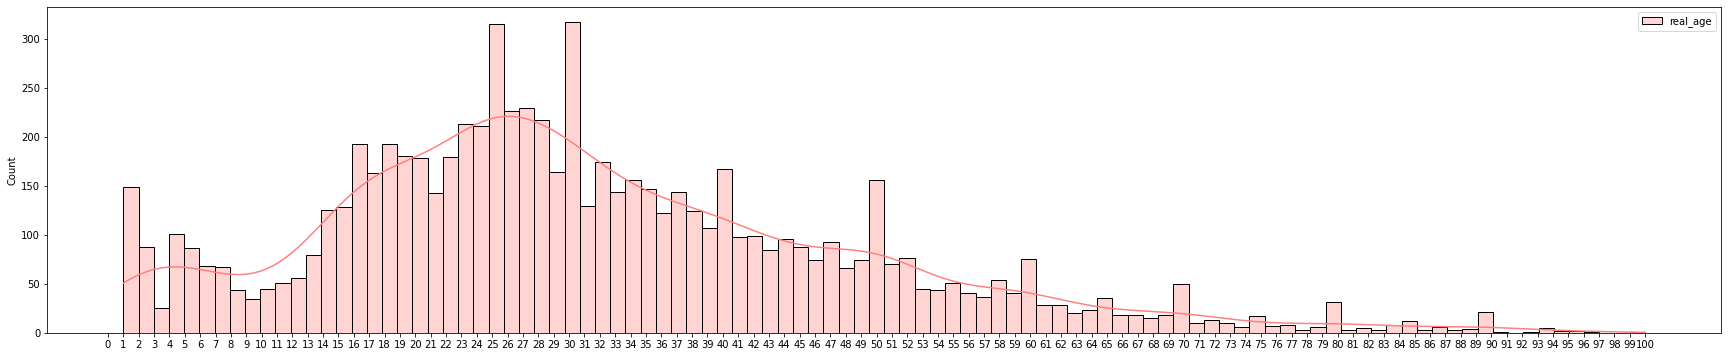

Found 7591 validated image filenames.


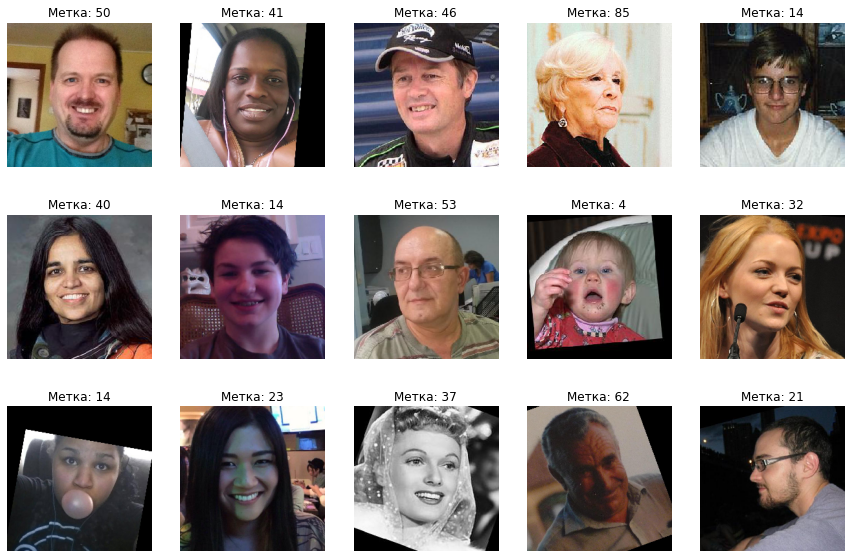

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data = pd.read_csv('/datasets/faces/labels.csv')

data.head()

x = range(0, 101, 1)
plt.figure(figsize=(30, 6))
sns.histplot(data=data, alpha=0.33, kde=True, palette='spring', bins=100) #bins=20) РЕВЬЮЕР ШАЛИТ

plt.xticks(x)
plt.show()

df = pd.DataFrame()
train_datagen = ImageDataGenerator(rescale=1./255)
images = train_datagen.flow_from_dataframe(data,
                                           directory='/datasets/faces/final_files/',
                                           x_col='file_name',
                                           y_col='real_age',
                                           target_size=(224, 224),
                                           class_mode='raw', batch_size=16, seed=12345)

batch = next(images)

plt.figure(figsize=(15, 10))

for i in range(0, 15):
    image = batch[0][i]
    label = batch[1][i]
    
    plt.subplot(3, 5, i + 1)
    plt.imshow(image)
    plt.title(f'Метка: {label}')
    plt.axis('off')

## Обучение модели

Перенесите сюда код обучения модели и её результат вывода на экран.


(Код в этом разделе запускается в отдельном GPU-тренажёре, поэтому оформлен не как ячейка с кодом, а как код в текстовой ячейке)

```python

# < скопируйте код сюда >
import pandas as pd

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator



def load_train(path):
    
    labels = pd.read_csv(path + 'labels.csv')
    
    
    train_datagen = ImageDataGenerator(validation_split=.25, rescale=1./255, vertical_flip=True, horizontal_flip=True)
    
    train_datagen_flow = train_datagen.flow_from_dataframe(labels,
                                                           directory = path + 'final_files/', #'/datasets/faces/final_files/',
                                                           x_col = 'file_name',
                                                           y_col = 'real_age',
                                                           target_size=(224, 224),
                                                           batch_size=64,
                                                           class_mode='raw',
                                                           subset='training',
                                                           seed=2777)
    return train_datagen_flow 

def load_test(path):
    
    labels = pd.read_csv(path + 'labels.csv')
    
    test_datagen = ImageDataGenerator(validation_split=.25, rescale=1./255)
    
    test_datagen_flow = test_datagen.flow_from_dataframe(labels,
                                                         directory = path + 'final_files/', #'/datasets/faces/final_files/',
                                                         target_size=(224, 224),
                                                         x_col = 'file_name',
                                                         y_col = 'real_age',
                                                         batch_size=64,
                                                         class_mode='raw',
                                                         subset='validation',
                                                         seed=2777)
    return test_datagen_flow

def create_model(input_shape):
    
    backbone = ResNet50(input_shape=input_shape,
                        weights='/datasets/keras_models/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5',
                        include_top=False)
    
    model = Sequential()
    
    model.add(backbone)
    
    model.add(GlobalAveragePooling2D())
    
    model.add(Dense(1, activation='relu'))
    
    optimizer = Adam(learning_rate=0.001)
    
    model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['mean_absolute_error'])
    
    return model

def train_model(model,
                train_datagen_flow,
                test_datagen_flow,
                epochs=10,
                steps_per_epoch= 6073 / 64,
                validation_steps= 1518 / 64):
    
    model.fit(train_datagen_flow,
              validation_data=test_datagen_flow,
              verbose=2,
              epochs=epochs)#,
              #steps_per_epoch=(steps_per_epoch / epochs),
              #validation_steps=(validation_steps / epochs))
    
    return model


```

```

# < скопируйте результат вывода на экран сюда >
<class 'tensorflow.python.keras.engine.sequential.Sequential'>
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
Train for 178 steps, validate for 30 steps
Epoch 1/10
2024-07-11 19:50:20.252793: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2024-07-11 19:50:20.631005: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudnn.so.7
178/178 - 60s - loss: 12.1892 - mean_absolute_error: 12.1894 - val_loss: 24.3993 - val_mean_absolute_error: 24.3588
Epoch 2/10
178/178 - 49s - loss: 8.2256 - mean_absolute_error: 8.2255 - val_loss: 24.0318 - val_mean_absolute_error: 23.9922
Epoch 3/10
178/178 - 50s - loss: 7.4050 - mean_absolute_error: 7.4052 - val_loss: 14.2706 - val_mean_absolute_error: 14.2508
Epoch 4/10
178/178 - 49s - loss: 6.7481 - mean_absolute_error: 6.7474 - val_loss: 9.4367 - val_mean_absolute_error: 9.4379
Epoch 5/10
178/178 - 49s - loss: 6.3288 - mean_absolute_error: 6.3287 - val_loss: 7.3465 - val_mean_absolute_error: 7.3450
Epoch 6/10
178/178 - 48s - loss: 5.9161 - mean_absolute_error: 5.9159 - val_loss: 7.1260 - val_mean_absolute_error: 7.1191
Epoch 7/10
178/178 - 49s - loss: 5.6787 - mean_absolute_error: 5.6788 - val_loss: 6.6231 - val_mean_absolute_error: 6.6124
Epoch 8/10
178/178 - 49s - loss: 5.3378 - mean_absolute_error: 5.3381 - val_loss: 6.5789 - val_mean_absolute_error: 6.5516
Epoch 9/10
178/178 - 49s - loss: 5.1326 - mean_absolute_error: 5.1325 - val_loss: 6.8510 - val_mean_absolute_error: 6.8574
Epoch 10/10
178/178 - 49s - loss: 5.0438 - mean_absolute_error: 5.0440 - val_loss: 6.5263 - val_mean_absolute_error: 6.5250
WARNING:tensorflow:sample_weight modes were coerced from
  ...
    to  
  ['...']
30/30 - 12s - loss: 6.5263 - mean_absolute_error: 6.5250
# < длинные строки со скачиванием модели можно удалить >

```

## Анализ обученной модели

## Вывод 

В данном проекте передомной стояла задача по определению возраста покупателя в прикассовой зоне. 

**Исследовательский анализ данных** - после проведенного анализа данных была выявленна закономерность, что после 30 чаще всего пиковыми значениями являются "круглые значения" 40, 50, 60... это может быть связанно с тем что люди после 30 придают меньшее значение возрасту чем более молодые. Так же больше всего данных людей от 15 до 45, возможно модель будет лучше справляться именно с этой категорией.

**Практическое применение модели** - магазин предполагал использовать модель для решения двух задач, лучше узнать своих покупателей чтобы более персонально подходить к каждой возратной группе и отслеживание продажи алкоголя несовершеннолетним. Разберем это более детально.

**Задача "узнать покупателя лучше** думаю с этой задачей модель справится прекрасно особенно если добавить пару модераторов для отслеживания спорных случаев, модель имея ошибку всего в 6.114 может довольно точно помочь в опеределении возраста взрослого человека, с детьми может быть немного сложнее, но тут уже думаю можно либо модерировать данные либо строить/улучшать модель преимущественно на данных с детями

**Задача "А вам точно есть 18?"** В данном случае я считаю что модель нужно обучать на данных преимущественно детей-подростков и уже меньшим количеством взрослых так как в данном случае уже стоит вопрос `больше` или `меньше` 18 (21) человеку лет. В данном случае ошибка в 6 лет может быть слишком критична.

## Общий вывод

Я считаю что модель хорошо справляется с задачей "узнать покупателя лучше", но недостаточно обучена для задачи "А вам точно есть 18?"

Я завершил проект по компьютерному зрению и очень рад что у меня получилось, меня даже не смогла остановить отвалившаяся GPU на сервере Практикума (૭ ｡•̀ ᵕ •́｡ )૭
Я смог относительно быстро обучить модель с метрикой 6.5250, модель обучилась примерно за 10 минут, думаю метрику можно еще улучшить. Самым сложным было разобраться с правильным подключением потоков данных, единственное я так и не совсем понял как правильно указывать steps_per_epoch и validation_steps